# **Heart Disease Prediction Using Logistic Regression**

## Introduction

Cardiovascular diseases are among the leading causes of mortality worldwide. Early detection and accurate prediction of heart disease can significantly improve patient outcomes by enabling timely medical intervention. In this notebook, we implement a logistic regression model to predict the presence of heart disease based on various clinical and demographic features.

## Objective

The primary objective of this analysis is to build and evaluate a predictive model that can classify individuals as having or not having heart disease based on available medical data. Logistic regression, a widely used statistical method for binary classification problems, is employed to achieve this goal.

## Dataset

We use a dataset containing various medical attributes such as age, cholesterol levels, blood pressure, and other indicators of cardiovascular health. The dataset is preprocessed to handle missing values, normalize numerical variables, and encode categorical features where necessary.

## Methodology

* **Data Preprocessing:** The dataset is already prepared. There are no heavy null or missing values.

* **Exploratory Data Analysis (EDA):** Visualizing and summarizing key patterns in the dataset.

* **Feature Selection:** Identifying the most relevant variables for prediction.

* **Model Training:** Implementing logistic regression and optimizing its parameters.

* **Model Evaluation:** Assessing performance using metrics such as accuracy, precision, recall, and the confusion matrix.

* **Interpretation:** Understanding the impact of different features on heart disease prediction.

## Expected Outcome

By the end of this notebook, we aim to develop a well-calibrated logistic regression model capable of predicting heart disease with high accuracy. Additionally, we will interpret the model's coefficients to understand the influence of different factors on the risk of developing heart disease.

### Package Installation

In this block, we are installing all the necessary Python packages required for data processing, analysis, and visualization.

- **pandas**: A powerful library for data manipulation and analysis.
- **numpy**: A package for scientific computing with support for large, multi-dimensional arrays and matrices.
- **seaborn**: A statistical data visualization library built on top of matplotlib, providing an easy-to-use interface for generating informative plots.
- **matplotlib**: A library for creating static, animated, and interactive visualizations in Python.
- **plotly**: A graphing library for creating interactive visualizations.
- **scipy**: A library for scientific and technical computing, including optimization, linear algebra, and statistics.
- **statsmodels**: A library for estimating statistical models, performing hypothesis tests, and statistical data analysis.
- **scikit-learn**: A library for machine learning, providing simple and efficient tools for data mining and data analysis.
- **statstests**: A custom or third-party library for statistical tests (likely a specialized package for your work).

These packages are crucial for preparing the data, performing machine learning tasks, and visualizing the results.


In [4]:
# In[0.1]: Package installation

!pip install pandas
!pip install numpy
!pip install -U seaborn
!pip install matplotlib
!pip install plotly
!pip install scipy
!pip install statsmodels
!pip install scikit-learn
!pip install statstests

### Package Import

This block of code imports the necessary Python libraries for data analysis, modeling, and visualization. Here's a breakdown of each:

- **`pandas`**: A library used for data manipulation and analysis in the form of dataframes.
- **`numpy`**: A package for performing mathematical operations, including array operations.
- **`seaborn`**: A data visualization library based on matplotlib, used for creating informative and attractive statistical graphics.
- **`matplotlib.pyplot`**: A plotting library used for creating static, animated, and interactive visualizations.
- **`scipy.interpolate.UnivariateSpline`**: A method for smoothing data, often used for curve fitting.
- **`statsmodels.api`**: A library used for estimating statistical models.
- **`statsmodels.formula.api`**: A submodule used for formulating models in a more readable syntax.
- **`statstests.process.stepwise`**: A method for performing the stepwise regression procedure, used for variable selection in regression models.
- **`scipy.stats`**: A submodule for statistical functions, including chi-square tests.
- **`plotly.graph_objects`**: A package for creating interactive 3D plots and visualizations.
- **`statsmodels.iolib.summary2.summary_col`**: A utility for comparing multiple models and summarizing their results.
- **`statsmodels.discrete.discrete_model.MNLogit`**: A model used for estimating multinomial logistic regression models.
- **`warnings`**: Used to suppress warnings, especially for cleaner output during code execution.

The code ensures that all the necessary libraries are available for running statistical analysis, creating visualizations, and building machine learning models.


In [5]:
# In[0.2]: Package Import

import pandas as pd # data manipulation in dataframe format
import numpy as np # mathematical operations
import seaborn as sns # graphical visualization
import matplotlib.pyplot as plt # graphical visualization
from scipy.interpolate import UnivariateSpline # smoothed sigmoid curve
import statsmodels.api as sm # model estimation
import statsmodels.formula.api as smf # binary logistic model estimation
from statstests.process import stepwise # Stepwise procedure
from scipy import stats # chi2 statistics
import plotly.graph_objects as go # 3D graphics
from statsmodels.iolib.summary2 import summary_col # model comparison
from statsmodels.discrete.discrete_model import MNLogit # multinomial logistic model estimation
import warnings
warnings.filterwarnings('ignore')

### Loading the Data
Here, we are loading the dataset from a CSV file into a pandas DataFrame. 
We also check the characteristics of the dataset and perform some descriptive statistics to understand the data.

In [6]:
# In[0.3] Loading the Data

df_heart = pd.read_csv('/kaggle/input/heart-failure-prediction/heart.csv', delimiter=',')
df_heart

# Features of the Dataset Variables
df_heart.info()

# Univariate Statistics
df_heart.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


### Frequency Table of Categorical Variables
In this section, we are checking the distribution of the categorical variables in the dataset. 
These variables include 'Sex', 'Chest Pain Type', 'Resting ECG', among others. 
The `value_counts()` function shows us how many times each category appears in the dataset.


In [7]:
# In[0.4] Absolute Frequency Table of Categorical Variables

df_heart['Sex'].value_counts().sort_index()
df_heart['ChestPainType'].value_counts().sort_index()
df_heart['RestingECG'].value_counts().sort_index()
df_heart['ExerciseAngina'].value_counts().sort_index()
df_heart['ST_Slope'].value_counts().sort_index()
df_heart['HeartDisease'].value_counts().sort_index()

HeartDisease
0    410
1    508
Name: count, dtype: int64

### Creating Dummy Variables
In this block of code, we are transforming the categorical variables into binary numeric variables 
(for example, 0 and 1) using the dummy variables technique. 
This is necessary because most machine learning models, such as logistic regression, require numeric inputs.


In [8]:
# In[0.5] Outro Metodo é Dummizar as Variáveis

df_heart_dummies = pd.get_dummies(df_heart,
                                  columns=['Sex',
                                           'ChestPainType',
                                           'RestingECG',
                                           'ExerciseAngina',
                                           'ST_Slope'],
                                  dtype=int,
                                  drop_first=True)

df_heart_dummies

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1.5,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0.0,0,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,1,0,0,1,1,0,0,1,0
914,68,144,193,1,141,3.4,1,1,0,0,0,1,0,0,1,0
915,57,130,131,0,115,1.2,1,1,0,0,0,1,0,1,1,0
916,57,130,236,0,174,0.0,1,0,1,0,0,0,0,0,1,0


In [9]:
# Features of the Dataset Variables
df_heart_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                918 non-null    int64  
 1   RestingBP          918 non-null    int64  
 2   Cholesterol        918 non-null    int64  
 3   FastingBS          918 non-null    int64  
 4   MaxHR              918 non-null    int64  
 5   Oldpeak            918 non-null    float64
 6   HeartDisease       918 non-null    int64  
 7   Sex_M              918 non-null    int64  
 8   ChestPainType_ATA  918 non-null    int64  
 9   ChestPainType_NAP  918 non-null    int64  
 10  ChestPainType_TA   918 non-null    int64  
 11  RestingECG_Normal  918 non-null    int64  
 12  RestingECG_ST      918 non-null    int64  
 13  ExerciseAngina_Y   918 non-null    int64  
 14  ST_Slope_Flat      918 non-null    int64  
 15  ST_Slope_Up        918 non-null    int64  
dtypes: float64(1), int64(15)
m

### Estimating the Binary Logistic Model Formula

In this block of code, we are preparing the formula for the binary logistic regression model. We start by creating a list of all columns in the dataset, excluding the target variable ('HeartDisease'). Then, we concatenate these column names to form the formula needed for logistic regression, where the target variable is predicted based on the other features. The formula is in the form: `HeartDisease ~ feature1 + feature2 + ...`. 

After defining the formula, we use the `sm.Logit` function from the **statsmodels** library to create and fit the logistic regression model based on the formula and the data in `df_heart_dummies`. This model will estimate the probability of having heart disease based on the input features.


In [10]:
# In[0.6] Let's Estimate the Formula of Binary Logistic Model

# Removing the Target
list_columns = list(df_heart_dummies.drop(columns=['HeartDisease']))

formula_dummies_model = ' + '.join(list_columns)
formula_dummies_model = "HeartDisease ~ " + formula_dummies_model
print(formula_dummies_model)

# Model using SM.LOGIT
model_heart = sm.Logit.from_formula(formula_dummies_model,
                                     df_heart_dummies).fit()


HeartDisease ~ Age + RestingBP + Cholesterol + FastingBS + MaxHR + Oldpeak + Sex_M + ChestPainType_ATA + ChestPainType_NAP + ChestPainType_TA + RestingECG_Normal + RestingECG_ST + ExerciseAngina_Y + ST_Slope_Flat + ST_Slope_Up
Optimization terminated successfully.
         Current function value: 0.323630
         Iterations 7


### Analyzing the Results

In this block, we start by displaying the summary of the logistic regression model using the `model_heart.summary()` method. This summary provides valuable statistical information about the model's coefficients, p-values, and other important metrics that help assess the model's performance and the significance of each feature.

Next, we apply the **Stepwise procedure** to improve the model by selecting the most significant variables. The `stepwise` function from the `statstests.process` module is used to perform this feature selection. The stepwise procedure helps in refining the model by removing variables that do not contribute significantly to the prediction, based on a sp


In [11]:
# In[0.7] Analyzing the Results

model_heart.summary()

# Stepwise Procedure
from statstests.process import stepwise

# Estimating the model using the Stepwise procedure
step_model_heart = stepwise(model_heart, pvalue_limit=0.05)

Regression type: Logit 

Estimating model...: 
 HeartDisease ~ Q('Age') + Q('RestingBP') + Q('Cholesterol') + Q('FastingBS') + Q('MaxHR') + Q('Oldpeak') + Q('Sex_M') + Q('ChestPainType_ATA') + Q('ChestPainType_NAP') + Q('ChestPainType_TA') + Q('RestingECG_Normal') + Q('RestingECG_ST') + Q('ExerciseAngina_Y') + Q('ST_Slope_Flat') + Q('ST_Slope_Up')
Optimization terminated successfully.
         Current function value: 0.323630
         Iterations 7

 Discarding atribute "Q('RestingECG_Normal')" with p-value equal to 0.515021924819649 

Estimating model...: 
 HeartDisease ~ Q('Age') + Q('RestingBP') + Q('Cholesterol') + Q('FastingBS') + Q('MaxHR') + Q('Oldpeak') + Q('Sex_M') + Q('ChestPainType_ATA') + Q('ChestPainType_NAP') + Q('ChestPainType_TA') + Q('RestingECG_ST') + Q('ExerciseAngina_Y') + Q('ST_Slope_Flat') + Q('ST_Slope_Up')
Optimization terminated successfully.
         Current function value: 0.323861
         Iterations 7

 Discarding atribute "Q('RestingECG_ST')" with p-value e

### Creating the Confusion Matrix Function
In this section, we implement a custom function to compute the confusion matrix based on the predictions and observed values. 
Additionally, we calculate and display important indicators such as Sensitivity, Specificity, and Accuracy.

In [14]:
# In[0.8] Building the Function for the Confusion Matrix

from sklearn.metrics import confusion_matrix, accuracy_score,\
    ConfusionMatrixDisplay, recall_score

def confusion_matrix_function(predicts, observed, cutoff):
    
    values = predicts.values
    
    binary_prediction = []
        
    for item in values:
        if item < cutoff:
            binary_prediction.append(0)
        else:
            binary_prediction.append(1)
           
    cm = confusion_matrix(binary_prediction, observed)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.xlabel('True')
    plt.ylabel('Classified')
    plt.gca().invert_xaxis()
    plt.gca().invert_yaxis()
    plt.show()
        
    sensitivity = recall_score(observed, binary_prediction, pos_label=1)
    specificity = recall_score(observed, binary_prediction, pos_label=0)
    accuracy = accuracy_score(observed, binary_prediction)

    # Visualizing the main indicators of this confusion matrix
    indicators = pd.DataFrame({'Sensitivity':[sensitivity],
                               'Specificity':[specificity],
                               'Accuracy':[accuracy]})
    return indicators

### Constructing the Confusion Matrix

In this block of code, we are generating the confusion matrix for evaluating the performance of our logistic regression model. 

First, we add a new column, 'phat', to the dataset, which contains the predicted probabilities of the target variable (`HeartDisease`) being 1 (indicating the presence of heart disease). These predicted probabilities are obtained using the `predict()` method from the fitted logistic regression model (`step_modelo_heart`).

Next, we call the `confusion_matrix_function`, which takes the observed target values (`HeartDisease`) and the predicted probabilities (`phat`). The function uses a threshold (`cutoff`) of 0.5 to classify the probabilities into binary outcomes (0 or 1). It then computes and displays the confusion matrix, providing insights into the model's performance (true positives, false positives, true negatives, and false negatives).


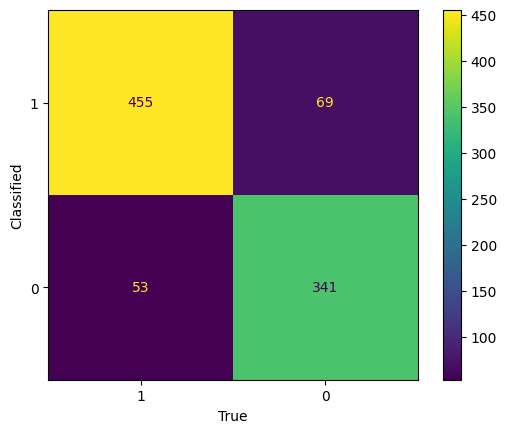

,Sensitivity,Specificity,Accuracy
0,0.895669,0.831707,0.867102


In [15]:
# In[0.9] Construção da matriz de confusão

# Adicionando os valores previstos de probabilidade na base de dados criando a coluna PHat
df_heart_dummies['phat'] = step_model_heart.predict()

# Matriz de confusão para cutoff = 0.5
confusion_matrix_function(observed=df_heart_dummies['HeartDisease'],
                predicts=df_heart_dummies['phat'],
                cutoff=0.50)


### Equalizing Specificity and Sensitivity Criteria for Educational Purposes

In this section, we create a function that calculates the sensitivity and specificity for a range of cutoff values in order to understand their trade-off. Sensitivity and specificity are key performance metrics used to evaluate binary classification models.

#### Steps:
1. **Predicted Values**: The function receives the observed target values (`observed`) and the predicted probabilities (`predicts`).
2. **Range of Cutoffs**: A range of cutoff values from 0 to 1 is defined with a step size of 0.01. This range represents the threshold above which the model will classify a prediction as positive (1) and below which it will classify it as negative (0).
3. **Sensitivity and Specificity Calculation**:
   - For each cutoff value, the function converts the predicted probabilities into binary predictions (0 or 1).
   - **Sensitivity** (True Positive Rate): It is calculated as the proportion of actual positive instances that are correctly predicted.
   - **Specificity** (True Negative Rate): It is calculated as the proportion of actual negative instances that are correctly predicted.
4. **Storing Results**: The sensitivity and specificity for each cutoff are stored in lists, and these lists are later combined into a DataFrame for easy visualization.

This function provides a detailed view of how sensitivity and specificity change with different cutoff thresholds, helping to understand model performance at various classification thresholds.


In [16]:
# In[1.0] Equalizing specificity and sensitivity criteria for educational purposes

def spec_sens(observed, predicts):
    
    # Add object with the predicted values
    values = predicts.values
    
    # Range of cutoffs to be analyzed in steps of 0.01
    cutoffs = np.arange(0, 1.01, 0.01)
    
    # Lists to store specificity and sensitivity results
    sensitivity_list = []
    specificity_list = []
    
    for cutoff in cutoffs:
        
        binary_prediction = []
        
        # Defining binary result according to the prediction
        for item in values:
            if item >= cutoff:
                binary_prediction.append(1)
            else:
                binary_prediction.append(0)
                
        # Calculate sensitivity and specificity for the cutoff
        sensitivity = recall_score(observed, binary_prediction, pos_label=1)
        specificity = recall_score(observed, binary_prediction, pos_label=0)
        
        # Add values to the lists
        sensitivity_list.append(sensitivity)
        specificity_list.append(specificity)
        
    # Create dataframe with results for their respective cutoffs
    result = pd.DataFrame({'cutoffs': cutoffs, 'sensitivity': sensitivity_list, 'specificity': specificity_list})
    return result


# Balancing Sensitivity and Specificity Criteria
Here we create a plot that shows how Sensitivity and Specificity vary with different cutoff values. 
The goal is to optimize both of these metrics by finding the balance between them.
The `cutoff` is the threshold above which a prediction is considered positive (Heart Disease).

In [17]:
# In[1.1] We create a dataframe that contains the vectors 'sensitivity', 'specificity', and 'cutoffs'

plotting_data = spec_sens(observed = df_heart_dummies['HeartDisease'],
                          predicts = df_heart_dummies['phat'])
plotting_data


,cutoffs,sensitivity,specificity
0,0.00,1.000000,0.000000
1,0.01,1.000000,0.021951
2,0.02,1.000000,0.165854
3,0.03,0.998031,0.180488
4,0.04,0.996063,0.221951
...,...,...,...
96,0.96,0.305118,0.990244
97,0.97,0.242126,0.995122
98,0.98,0.141732,1.000000
99,0.99,0.039370,1.000000


# Plotting the Sensitivity and Specificity Graph
Now, we plot the graph to visualize how Sensitivity and Specificity change with different cutoffs. 
This graph helps us understand the impact of adjusting the cutoff on the model's performance metrics.

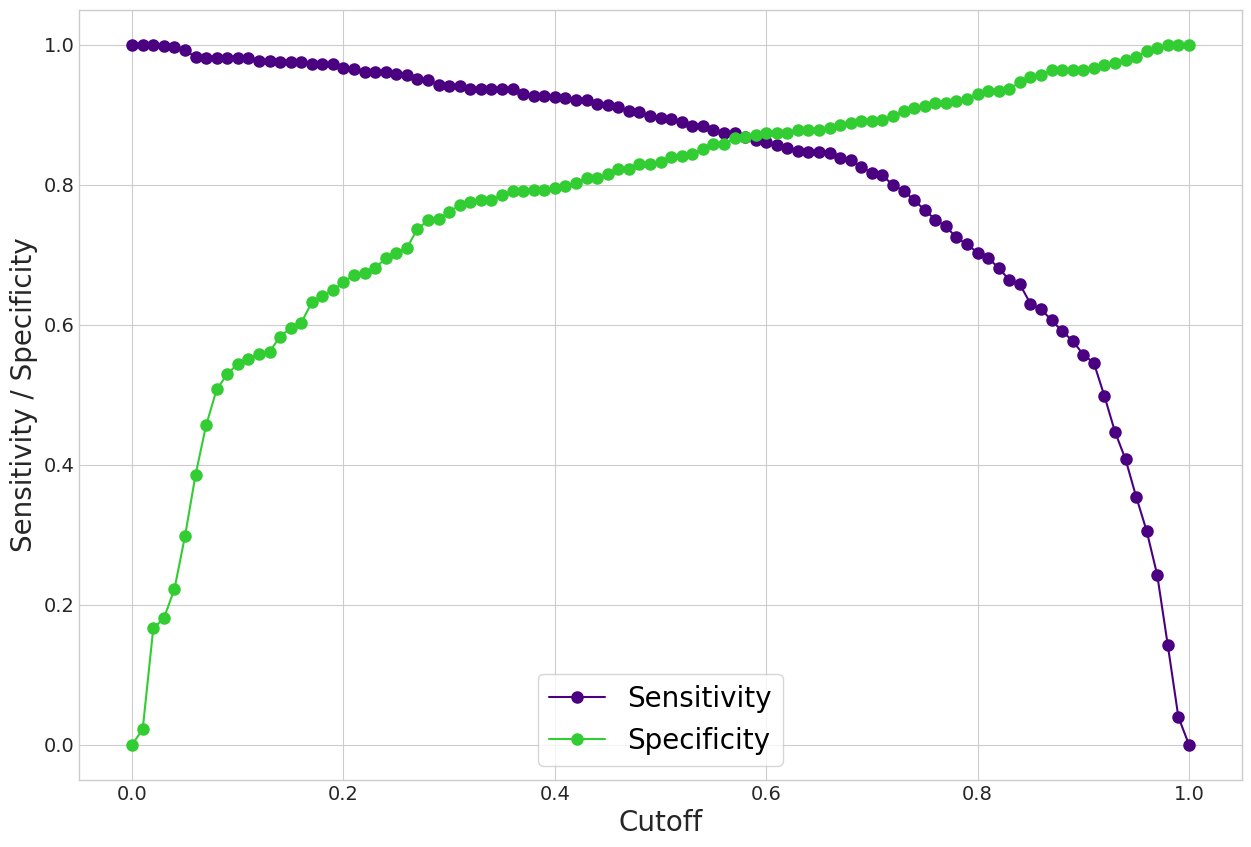

In [18]:
# In[1.2]: Plotting a graph that shows the variation of specificity and sensitivity as a function of the cutoff

plt.figure(figsize=(15,10))
with plt.style.context('seaborn-v0_8-whitegrid'):
    plt.plot(plotting_data.cutoffs, plotting_data.sensitivity, marker='o',
         color='indigo', markersize=8)
    plt.plot(plotting_data.cutoffs, plotting_data.specificity, marker='o',
         color='limegreen', markersize=8)
plt.xlabel('Cutoff', fontsize=20)
plt.ylabel('Sensitivity / Specificity', fontsize=20)
plt.xticks(np.arange(0, 1.1, 0.2), fontsize=14)
plt.yticks(np.arange(0, 1.1, 0.2), fontsize=14)
plt.legend(['Sensitivity', 'Specificity'], fontsize=20)
plt.show()

# Constructing the ROC Curve
The ROC (Receiver Operating Characteristic) curve is a way to evaluate the performance of our classification model. 
The AUC (Area Under the Curve) is a common metric that helps us understand how well the model discriminates between classes.
Here, we calculate the ROC curve and also the GINI coefficient, which is another way to measure the quality of the model.

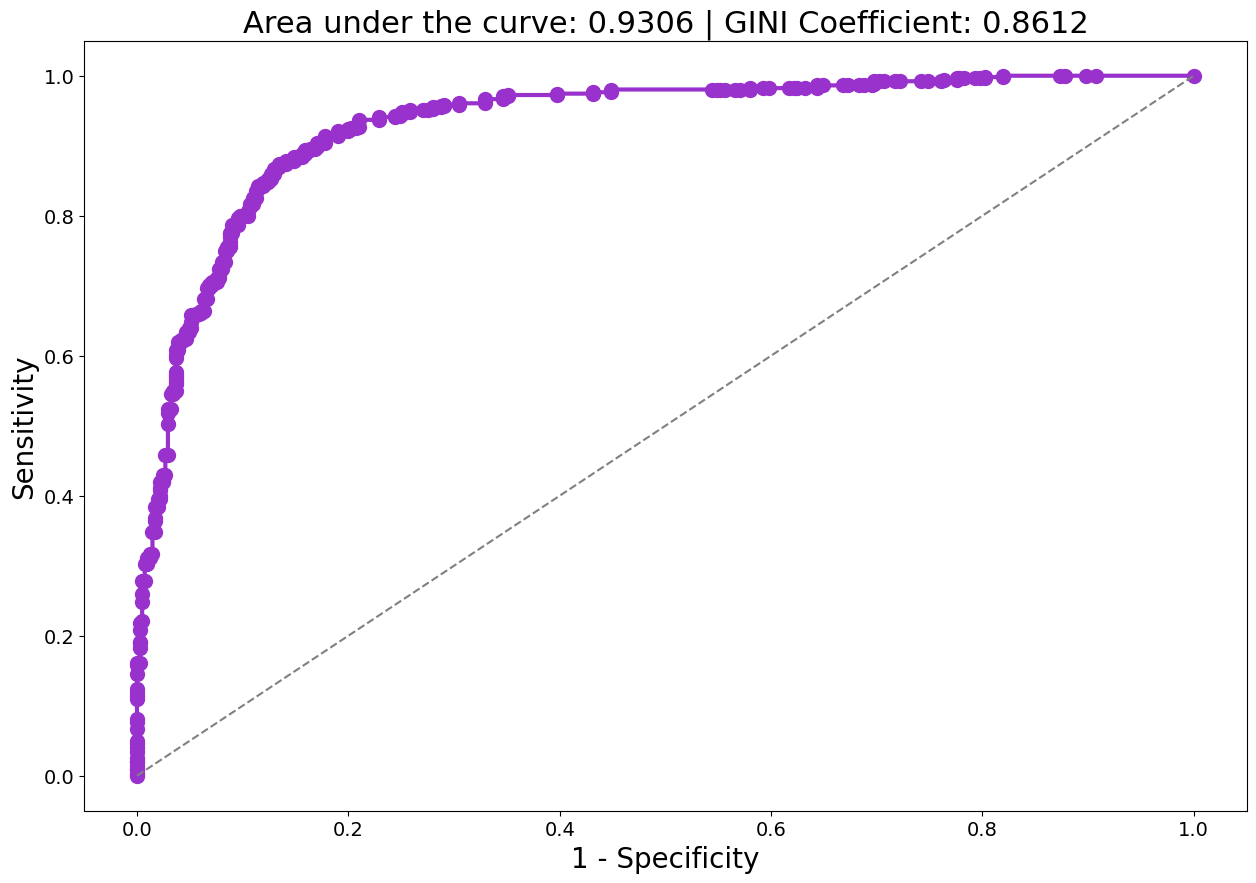

In [19]:
# In[1.3] Construction of the ROC Curve

from sklearn.metrics import roc_curve, auc

# 'roc_curve' function from the 'metrics' package in sklearn

fpr, tpr, thresholds = roc_curve(df_heart_dummies['HeartDisease'],
                                 df_heart_dummies['phat'])
roc_auc = auc(fpr, tpr)

# Calculation of the GINI coefficient
gini = (roc_auc - 0.5) / (0.5)

# Plotting the ROC curve
plt.figure(figsize=(15,10))
plt.plot(fpr, tpr, marker='o', color='darkorchid', markersize=10, linewidth=3)
plt.plot(fpr, fpr, color='gray', linestyle='dashed')
plt.title('Area under the curve: %g' % round(roc_auc, 4) +
          ' | GINI Coefficient: %g' % round(gini, 4), fontsize=22)
plt.xlabel('1 - Specificity', fontsize=20)
plt.ylabel('Sensitivity', fontsize=20)
plt.xticks(np.arange(0, 1.1, 0.2), fontsize=14)
plt.yticks(np.arange(0, 1.1, 0.2), fontsize=14)
plt.show()

# **Conclusion**

In this project, we applied a binary logistic regression model to predict the presence of heart disease using various clinical features. The model was evaluated using several performance metrics, including the Area Under the Curve (AUC), GINI coefficient, confusion matrix, and other classification metrics like sensitivity, specificity, and accuracy.

## Key Results:
- **Area Under the Curve (AUC)**: The AUC of 0.9306 indicates excellent model performance. An AUC value close to 1 suggests that the model has a high ability to distinguish between the two classes (heart disease present or absent).
- **GINI Coefficient**: The GINI coefficient of 0.8612 reinforces the model's ability to discriminate between the positive and negative classes. A GINI value close to 1 indicates a highly discriminatory model.
  
### Confusion Matrix:
- **True Positives (TP)**: 455
- **True Negatives (TN)**: 341
- **False Positives (FP)**: 69
- **False Negatives (FN)**: 53

These values show that the model correctly identifies most of the instances of both heart disease and non-heart disease, but there are still some misclassifications, particularly in the false positives and false negatives.

### Performance Metrics (for a cutoff of 0.5):
- **Sensitivity (True Positive Rate)**: 0.8956, which indicates that the model correctly identifies 89.56% of the patients with heart disease.
- **Specificity (True Negative Rate)**: 0.8317, meaning that the model correctly identifies 83.17% of the patients without heart disease.
- **Accuracy**: 0.8671, which means that approximately 86.71% of all predictions made by the model are correct.

Overall, the logistic regression model demonstrates strong predictive power with high sensitivity, specificity, and accuracy. The model is effective in identifying patients at risk for heart disease, although there is room for improvement, particularly in minimizing false positives and false negatives.
